In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cost Function
def mean_squared_error(y_true,y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true - y_predicted)**2) / len(y_true)
    return cost

In [13]:
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations= 1000, learning_rate= 0.0001, stopping_threshold= 1e-6):
    
    # Initializing slope, intercept, learninng rate and iterations
    current_slope = 0.1
    current_intercept = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    
    costs = []
    slopes = []
    previous_cost = None
    
    # Estimation of optimal parameters
    for i in range(iterations):
        
        # Making predictions
        y_predicted = (current_slope * x) + current_intercept
        
        # Calculating the Current Cost
        current_cost = mean_squared_error(y, y_predicted)
        
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and (previous_cost - current_cost) <= stopping_threshold:
            break
            
        previous_cost = current_cost
        
        costs.append(current_cost)
        slopes.append(current_slope)
        
        # Calculating the gradients
        slope_derivative = (2/n) * sum(x * (y_predicted - y))
        intercept_derivative = (2/n) * sum(y_predicted - y)
        
        # Updating Slopes and intercepts
        current_slope = current_slope - (learning_rate * slope_derivative)
        current_intercept = current_intercept - (learning_rate * intercept_derivative)
        
        # Printing the parameters fr each 1000th iterations
        print(f"Iteration {i+1}: Cost: {current_cost}, Slope: {current_slope}, Intercept: {current_intercept}")
        
    
    # Visualizing the slope and cost at for all iterations
    plt.figure(figsize=(8,6))
    plt.plot(slopes, costs)
    plt.scatter(slopes, costs, marker='o', color='red')
    plt.title("Cost vs Slopes")
    plt.ylabel("Cost")
    plt.xlabel("Slopes")
    plt.show()
    
    return current_slope, current_intercept

In [14]:
# Data
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
    
    

Iteration 1: Cost: 4352.088931274409, Slope: 0.7593291142562117, Intercept: 0.02288558130709
Iteration 2: Cost: 1114.8561474350017, Slope: 1.081602958862324, Intercept: 0.02918014748569513
Iteration 3: Cost: 341.42912086804455, Slope: 1.2391274084945083, Intercept: 0.03225308846928192
Iteration 4: Cost: 156.64495290904443, Slope: 1.3161239281746984, Intercept: 0.03375132986012604
Iteration 5: Cost: 112.49704004742098, Slope: 1.3537591652024805, Intercept: 0.034479873154934775
Iteration 6: Cost: 101.9493925395456, Slope: 1.3721549833978113, Intercept: 0.034832195392868505
Iteration 7: Cost: 99.4293893333546, Slope: 1.3811467575154601, Intercept: 0.03500062439068245
Iteration 8: Cost: 98.82731958262897, Slope: 1.3855419247507244, Intercept: 0.03507916814736111
Iteration 9: Cost: 98.68347500997261, Slope: 1.3876903144657764, Intercept: 0.035113776874486774
Iteration 10: Cost: 98.64910780902792, Slope: 1.3887405007983562, Intercept: 0.035126910596389935
Iteration 11: Cost: 98.6408965145935

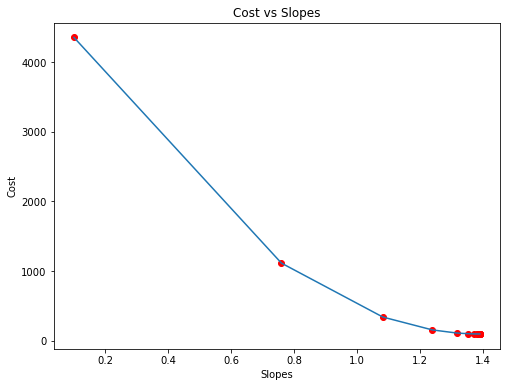

Estimated Slope: 1.389738813163012 Estimated Intercept: 0.03509461674147458


In [15]:
# Estimating slope and intercept using gradient descent
estimated_slope, estimated_intercept = gradient_descent(X,Y,iterations=2000)
print(f"Estimated Slope: {estimated_slope} Estimated Intercept: {estimated_intercept}")

In [16]:
# Making predictions using estimated parameters
Y_pred = estimated_slope*X + estimated_intercept

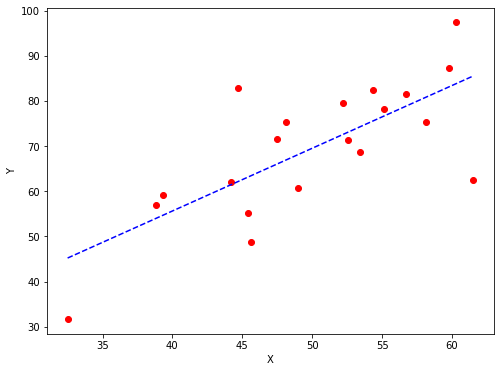

In [17]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()